In [853]:
# Ryker Dolese, CAAM 210, FALL 2022, Project 10 for the Bridge Project in Python
# BridgePython.ipynp
# This script is for the 10th Project on Canvas 
# Last Modified: November 10th, 2022

In [193]:
import math
import matplotlib.pyplot as plt
import numpy as np

In [353]:
def build_basic_bridge (nos):
    # Inputs: nos (integer) (# of sections of bridge)
    # Outputs: 
    # - adj, np.ndarray, (adjacency matrix)
    # - xc, np.ndarray, (x coordinates of each node/endpoint of fibers)
    # - yc, np.ndarray, (y coordinates of each node/endpoint of fibers)
    # - L, np.ndarray, (length of fibers)
    # This function takes into consideration the number of sections the bridge
    # has to compute the adjacency matrix.

    nodes = 2*nos+2 # equation for finding # of nodes based on # of sections
    fibers = 5*nos+5 # finding # of edges based on # of sections
    
    s = 1/math.sqrt(2) # cos and sin of 45 degrees is 1/sqrt(2) - will be useful later
    
    adj = np.matrix(np.zeros((fibers, 2*nodes)))
    xc = np.zeros((fibers,2)) # initialize x-coordinate matrix
    yc = np.zeros((fibers,2)); # initialize x-coordinate matrix

    L = np.ones((fibers)) # initialize length vector
    # build right side of bridge
    xc[0, :] = [0, 1] # set first beam's x-coordinates # put commas in list
    xc[1, :] = [0, 1] # set 2nd beam's x-coordinates
    yc[0, :] = [0, 0] # set first beam's y-coordinates
    yc[1, :] = [0, 1] # set second beam's y-coordinates
    L[1] = 1/s # is it 1 or 2?

    adj[0,0] = 1 # first beam has an N1x component of +1
    adj[1,[2,3]] = [s, s]; # means that beam 2 has an N2x component of 1/sqrt2

    for i in range(0, nos):
    # use for loop to build middle of bridge   
        R = i*5+2 # intialize rows
        C = i*4+0 # initialize columns (remember to do -2 for C and -1 for R) cuz i added +1
        adj[R+0, [C+1,C+3]] = [-1, 1] 
        adj[R+1, [C+2, C+3, C+4, C+5]] = [-s, s, s, -s]
        adj[R+2, [C+2,C+6]] = [-1, 1]
        adj[R+3, [C+0,C+1,C+6,C+7]] = [-s, -s, s, s]
        adj[R+4, [C+0,C+4]] = [-1, 1]
    #this loop structure generates the core of the adjacency matrix. It
    #works for any-size bridge
    
    
        xc[R+0,:] = [i+1, i+1]
        xc[R+1,:] = [i+2, i+1]
        xc[R+2,:] = [i+1, i+2]
        xc[R+3,:] = [i+1, i+2]
        xc[R+4,:] = [i+1, i+2]
      # coding xc coordinates modification occurs here
        yc[R+0,:] = [0, 1]
        yc[R+1,:] = [0, 1]
        yc[R+2,:] = [1, 1]
        yc[R+3,:] = [0, 1]
        yc[R+4,:] = [0, 0]
      # coding for yc modification occurs here
        L[R+0] = 1
        L[R+1] = 1/s 
        L[R+2] = 1
        L[R+3] = 1/s
        L[R+4] = 1      
    # use same pattern from above to determine length of beams; diagonal beams are longer

    # this uses the above process to code for the right side of the bridge
    R = 2+5*nos
    C = 0+4*nos
    n = nos
    adj[R+0,[C+1,C+2,C+3]] = [-1,0, 1]
    adj[R+1,[C+2,C+3]] = [-s, s]
    adj[R+2,[C+0, C+1]] = [-1, 0]
    # constructing adjacency matrix
    xc[R+0, :] = [nos+1,nos+1]
    xc[R+1, :] = [nos+2,nos+1] 
    xc[R+2, :] = [nos+1,nos+2]
    # defining x-coordinates of the right side
    yc[R+0, :] = [0, 1]
    yc[R+1, :] = [0, 1]
    yc[R+2,:] = [0, 0]
    # defining y-coordinates of the right side
    L[R+1] = 1/s
    return adj, xc, yc, L, fibers



In [354]:
def ForceGenerator(nos, car_weight):
    # Inputs:
        # - nos, (integer), number of sections in bridge
        # - car_weight, (float) the car weight
    # Outputs:
        # - force, (np.ndarray), the force vector
    #This function outputs a force vector that will deform the bridge
    nodes = 2 + 2*nos
    force = np.zeros((2*nodes,1)) 
    for i in range(1, len(force), 4): # run for loop for amount of different car weights
        force[i]= -1*car_weight
        
    
    return force

In [355]:
def deform_basic_bridge (nos,adj,xc,yc,L,fibers,force, car_weight):
    # Inputs: 
     # - nos (integer), # of sections
     # - adj, (np.matrix) adjacency matrix
     # - xc, (np.ndarray), x endpoints
     # - yc, (np.ndarray), y endpoints 
     # - L, (np.ndarray) length of fibers
     # - force, (np.ndarray) force of cars on bridge
     # - fibers, (integer), # of fibers that make up bridge
 
    # Outputs:
     # - dx, (np.ndarray), (displacement of x endpoints)
     # - dy, (np.ndarray), (displacement of y endpoints)
     # - work, (integer), (the work performed on the cars from force)
     # - X, (np.ndarray), (x displacements vector)
     # - Y, (np.ndarray), (y displacements vector)
     # This function uses the variables above to calculate the deformities in a
     # bridge given the force acting on the bridge from cars.
    
    K = np.identity(len(L))/L # find identity matrix
    S = adj.T@K@adj # find stiffness
    D = np.linalg.solve(S, force) # solve for displacements
   
    work = D.T@force # find work
    work = float(work) # make work a float value
    X = D[0::2] # define X and Y as displacements
    Y = D[1::2]
    cdx=np.zeros(np.shape(xc)) # create vectors for displacements
    cdy=np.zeros(np.shape(yc))              
    #cdx = np.zeros((xc.shape)) # produce the x displacement matrix of same size xc
    #cdy = np.zeros((yc.shape)) # produce the y displacement matrix of same size yc

    # here are beam 1 and 2's set of displacements:
    cdx[0,:] = xc[0,:] + [0, X[0,0]]
    cdx[1,:] = xc[1,:] + [0, X[1,0]]
    cdy[0,:] = yc[0,:] + [0, Y[0,0]]
    cdy[1,:] = yc[1,:] + [0, Y[1,0]] 

    j = -1 # dropping our index by 1 bc... well... python!
    t = -1
    for n in range (0, nos):
    #additions to the coordinates follows this framework:
    # xcd(n,:)=xc(n,:)+[dx(i) dx(j)]
    # ycd(n,:)=yc(n,:)+[dy(i) dy(j)]
        cdx[j+3,:] = xc[j+3,:] + [X[t+1,0], X[t+2,0]];
        cdx[j+4,:] = xc[j+4,:] + [X[t+3,0], X[t+2,0]];
        cdx[j+5,:] = xc[j+5,:] + [X[t+2,0], X[t+4,0]];
        cdx[j+6,:] = xc[j+6,:] + [X[t+1,0], X[t+4,0]];
        cdx[j+7,:] = xc[j+7,:] + [X[t+1,0], X[t+3,0]];
    
        cdy[j+3,:] = yc[j+3,:] + [Y[t+1,0], Y[t+2,0]];
        cdy[j+4,:] = yc[j+4,:] + [Y[t+3,0], Y[t+2,0]];
        cdy[j+5,:] = yc[j+5,:] + [Y[t+2,0], Y[t+4,0]];
        cdy[j+6,:] = yc[j+6,:] + [Y[t+1,0], Y[t+4,0]];
        cdy[j+7,:] = yc[j+7,:] + [Y[t+1,0], Y[t+3,0]];
    
        j = j+5; # add iterations for additional sections of bridge
        t = t+2;
        
       
    # use same format as above to create new endpoints for all the beams; this 
    # time they will be deformed!    
    
    # Once again, this deforms our right side of bridge

    R = 5*nos+2
    cdx[j+3,:] = xc[j+3,:] + [X[t+1,0], X[t+2,0]];
    cdx[j+4,:] = xc[j+4,:] + [0, X[t+2,0]];
    cdx[j+5,:] = xc[j+5,:] + [X[t+1,0], 0];

    cdy[j+3,:] = yc[j+3,:] + [Y[t+1,0], Y[t+2,0]];
    cdy[j+4,:] = yc[j+4,:] + [0, Y[t+2,0]];
    cdy[j+5,:] = yc[j+5,:] + [Y[t+1,0], 0];
       
    plot_deformed_bridge (nos, cdx, cdy, car_weight, work) # plotting our deformed bridge (called later in our driver)
    return cdx, cdy, work, X, Y

In [402]:
def plot_spy (adj, nos):
    # Inputs: 
    # - adj, (np.ndarray), (adjacency matrix)
    # - nos, (integer), (# of sections)
    # Outputs:
    # This produces a plot of our adjacency matrix using the spy command
    num_sec = str(nos) # naming our nos variable "num_sec"
    t = (str(nos)+' section basic bridge adjacency matrix'); 
    # title based on num_sec
    plt.figure() # produce figure for spy plot
    plt.spy(adj, marker = 'o', markerfacecolor = 'c', markersize = n) # use spy command to visualize adjacency matrix
    plt.xlabel('nonzero matrix columns') # give axes titles
    plt.ylabel('nonzero matrix rows')
    # use spy to produce plot of adjacency matrix
    plt.title(t) # call the title  


In [411]:
def plot_bridge (nos, xc, yc, car_weight = 0, work = 0):
    # Inputs:
    # - nos, (integer), (number of sections)
    # - xc, (np.ndarray), (x coordinates)
    # - yc, (np.ndarray), (y coordinates)
    # - car_weight, (integer), weight of car on bridge
    # - thickness (integer), (thickness of the fibers)
    # Outputs:
    # This creates the basic plots of our bridge given # of sections
    plt.figure  # produce figure
    plt.plot(xc.T,yc.T, 'g') # plot regular bridge with fun colors
    plt.axis ('off')
    plt.title(str(nos)+ ' Section Basic Bridge') # title our plot
    plt.fill([0,-1, -1, 1],[0, 0, -1, -1],'b') # fill in sides of bridge
    plt.fill([nos+2, nos+3, nos+3, nos+1],[0, 0, -1, -1],'b')
    
   

In [412]:
 def plot_deformed_bridge (nos, cdx, cdy, car_weight, work):
    # Inputs:
    # - nos, (integer), (number of sections)
    # - cdx, (np.ndarray), (deformed x coordinates)
    # - cdy, (np.ndarray), (deformed y coordinates)
    # - car_weight, (integer), weight of car on bridge
    # - work (float), the work done on the bridge
    # Outputs:
    # This creates the deformed plots of our bridge given # of sections and deformed coordinates
    plt.figure # produce figure
    plt.plot(cdx.T,cdy.T,'darkgoldenrod') # plot w fun colors!
    plt.axis('off')
    plt.title(str(nos)+ ' Section Basic Bridge with Car Weights of '+str(car_weight)+', Work = '+str(round(float(work),6))) # title plot using strings
    plt.fill([0, -1, -1, 1],[0, 0, -1, -1],'red') # fill in sides of bridge
    plt.fill([nos+2, nos+3, nos+3, nos+1],[0, 0, -1, -1],'red')

In [413]:
def build_load_plot_basic_bridge(nos,car_weight):
     # Inputs:
      # - nos (integer) (number of sections)
      # - car_weight, (integer) (weight of cars on nodes)
      # Outputs:
      # This builds the plots of our bridges and deforms them as necessary due to# the weight of the cars.
    
    [adj, xc, yc, L, fibers] = build_basic_bridge(nos) # building basic bridge w nos
    force = ForceGenerator(nos,car_weight) # creating force vector
    [cdx,cdy,work,X,Y] = deform_basic_bridge (nos,adj,xc,yc,L,fibers,force, car_weight) # deforming the bridge
    return adj,xc,yc,cdx,cdy,work
    

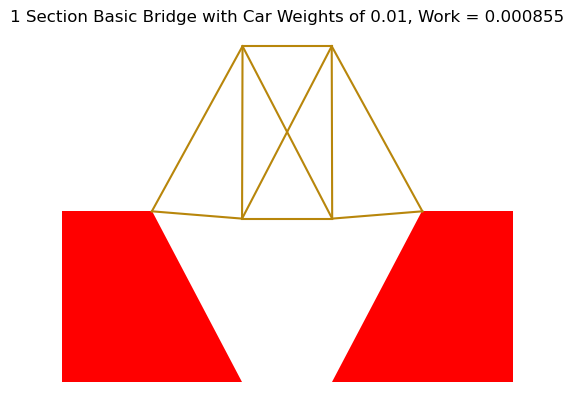

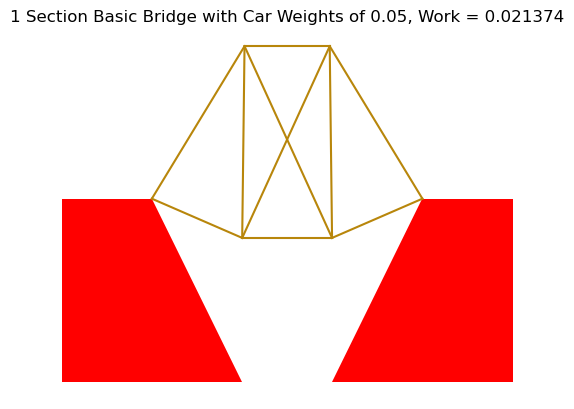

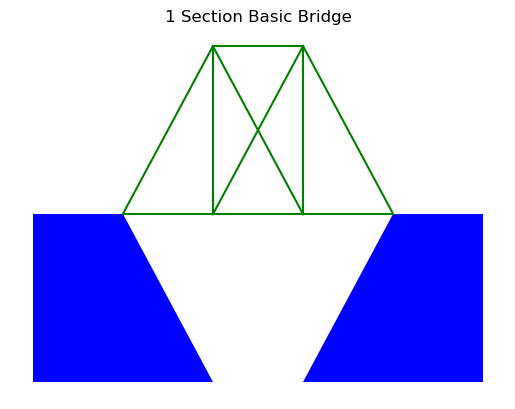

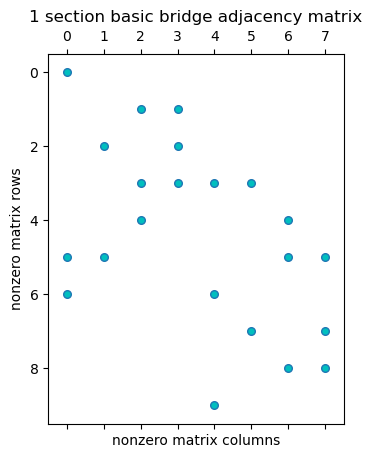

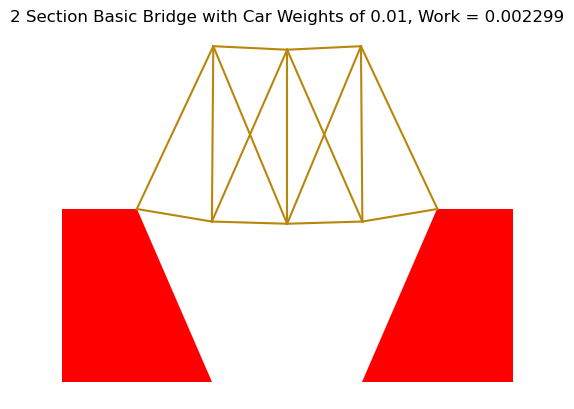

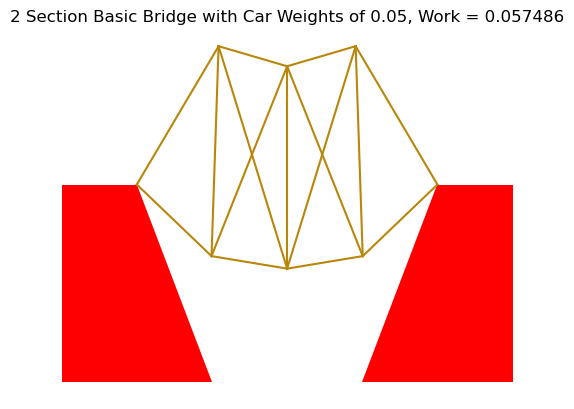

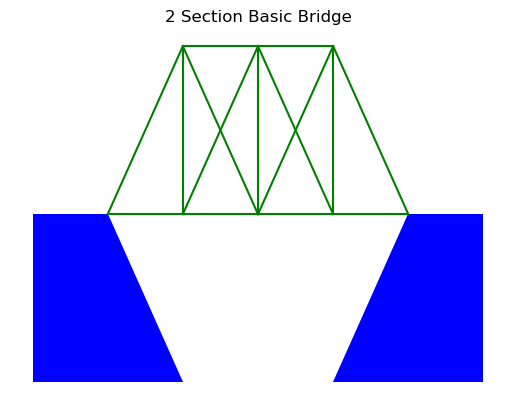

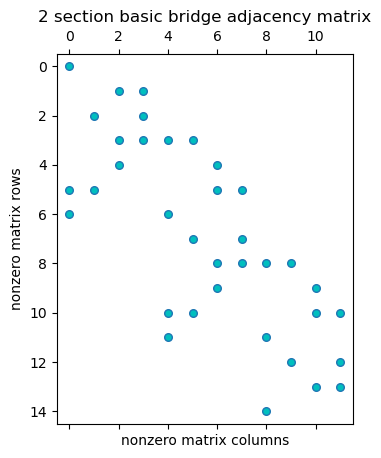

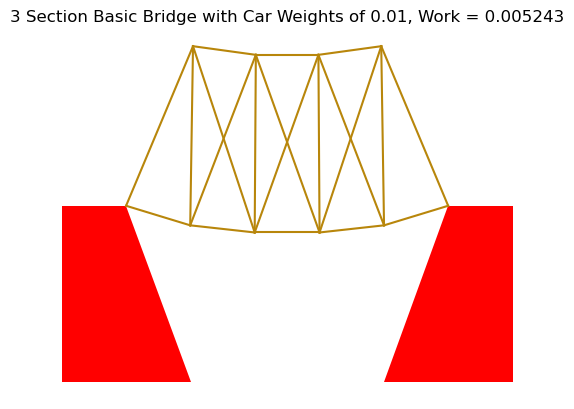

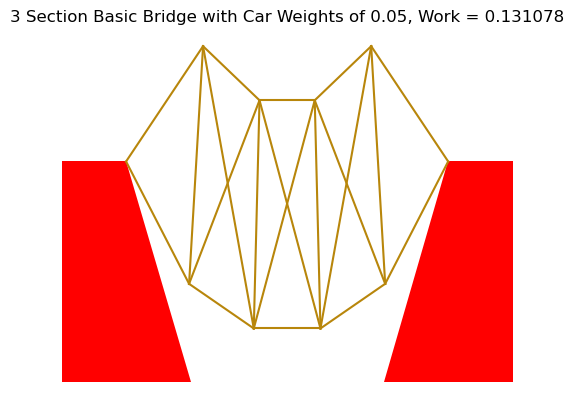

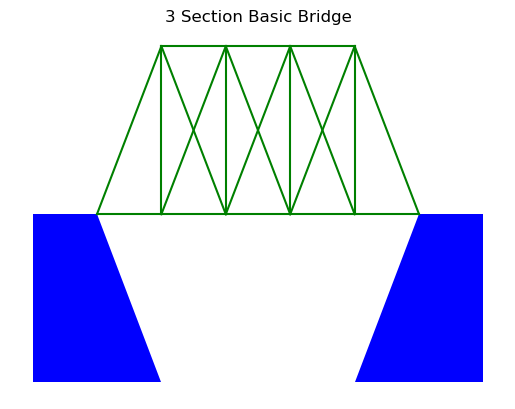

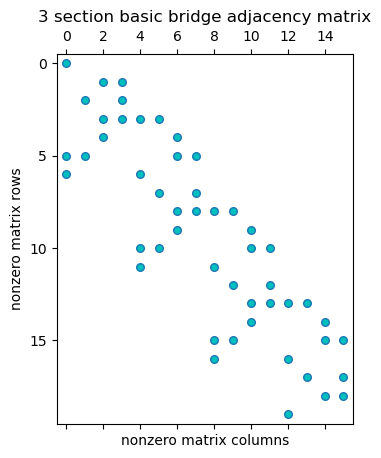

In [414]:
for nos in range(1,4):
# this is our main driver, calling our 2nd driver
    plt.figure() # produce figure for plot
    [adj,xc,yc,cdx,cdy,work] = build_load_plot_basic_bridge(nos,0.01) #deformed bridge w weights of 0.01
    plt.figure() # produce figure for plot
    [adj,xc,yc,cdx,cdy,work] = build_load_plot_basic_bridge(nos,0.05) # deformed bridge w weights of 0.05
    plt.figure()
    plot_bridge(nos,xc,yc) # plotting our basic bridges!
    plot_spy(adj,nos) # producing spy plots of our adjacency matrices
    
